# LAB3Part2 More Linear Regression with Health Datasets

Datasets: from kaggles https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility?select=heart.csv

Objective: Trying to figure out the correlation between choosing variables.

Plan: choose continuous values: age, trestbps, chol, thalach, oldpeak. Ignore other variables since they're binary

## 1. Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## 2. Import excel data file into pandas data frame 

Data Info:  
    
    Attribute Information  
1) age  
2) sex  
3) cp = chest pain type (4 values)  
4) trestbps = resting blood pressure  
5) chol = serum cholestoral in mg/dl  
6) fbs = fasting blood sugar > 120 mg/dl  
7) restecg = resting electrocardiographic results (values 0,1,2)  
8) thalach = maximum heart rate achieved  
9) exang = exercise induced angina  
10) oldpeak = ST depression induced by exercise relative to rest  
11) slope = the slope of the peak exercise ST segment  
12) ca = number of major vessels (0-3) colored by flourosopy  
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect  
14) target: 0= less chance of heart attack 1= more chance of heart attack  

In [2]:
df = pd.read_csv("health2.csv")

In [3]:
# to check dataframe, use display()
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Data Cleaning
#### There might be a possiblity that the data is missing its values. use "print(df.isnull().sum))" to check if the data is ready to be processed.  

In [4]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## 4. Feature Selection

Now that the data is good to go, we are ready to move on to the next step of the process. As there are 14 features in the dataset, we do not want to use all of these features for training our model, because not all of them are relevant. Instead, we want to choose those features that directly influence the result (that is, prices of houses) to train the model. For this, we can use the corr() function. The corr() function computes the pairwise correlation of columns:

In [5]:
corr = df.corr()
display(corr)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Choose one independent variable for looking for its correlation with other variables

In [6]:
#---get the top 3 features that has the highest correlation---
#select "Age" to see which variables has a strong correlation with age.  
 
print(df.corr().abs().nlargest(3, 'age').index)

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'age').values[:,13]) 

Index(['age', 'thalach', 'trestbps'], dtype='object')
[0.22543872 0.42174093 0.14493113]


### Since "thalach" and "trestbps" have high correlation values, we will use these two features to train our model.

## This is testing for looking for a best correlation values.

### In this data, I found that [age], [thalach], [taget] has a high value
*** Target is exception for now in this practice notebook ***

# Multiple Regression

## 5.1 plot a scatter plot showing the relationship between the "age" and "thalach" label:
hint: Figure6.4 from kvoval ch6

Text(0, 0.5, 'thalach')

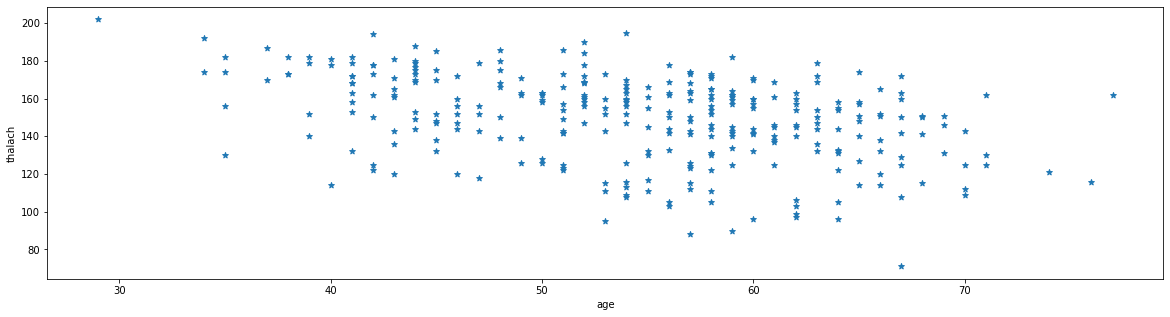

In [7]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.scatter(df['age'], df['thalach'], marker='*')
plt.xlabel('age')
plt.ylabel('thalach')

fig1: Scatter plot showing the relationship between "age" and "thalach"

## 5.2 Let’s also plot a scatter plot showing the relationship between the "age" feature and the "trestbps" label:
hint: Just change the variables

Text(0, 0.5, 'trestbps')

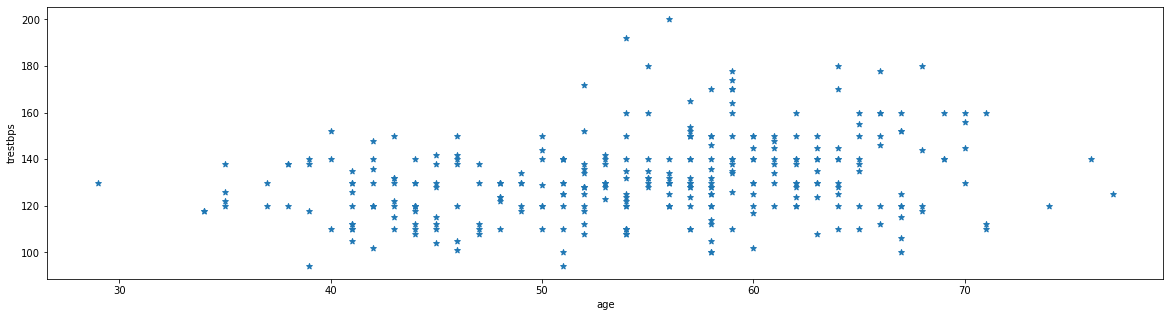

In [8]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.scatter(df['age'], df['trestbps'], marker='*')
plt.xlabel('age')
plt.ylabel('trestbps')

* Side Note: Using sns.regplot(x-value, y-value, ci = None) will give a better plotting with a line.

In [9]:
#sns.regplot(df['age'],df['trestbps'], ci=None) # uncomment and see the result

fig2: Scatter plot showing the relationship between "age" and "trestbps"

In [10]:
#sns.regplot(df['age'],df['chol'], ci=None) # uncomment and see the result

fig3: Scatter plot showing the relationship between "age" and "chol"

## 5.3 let’s plot the two features and the label on a 3D chart:
hint: Figure6.6 from knovel ch6

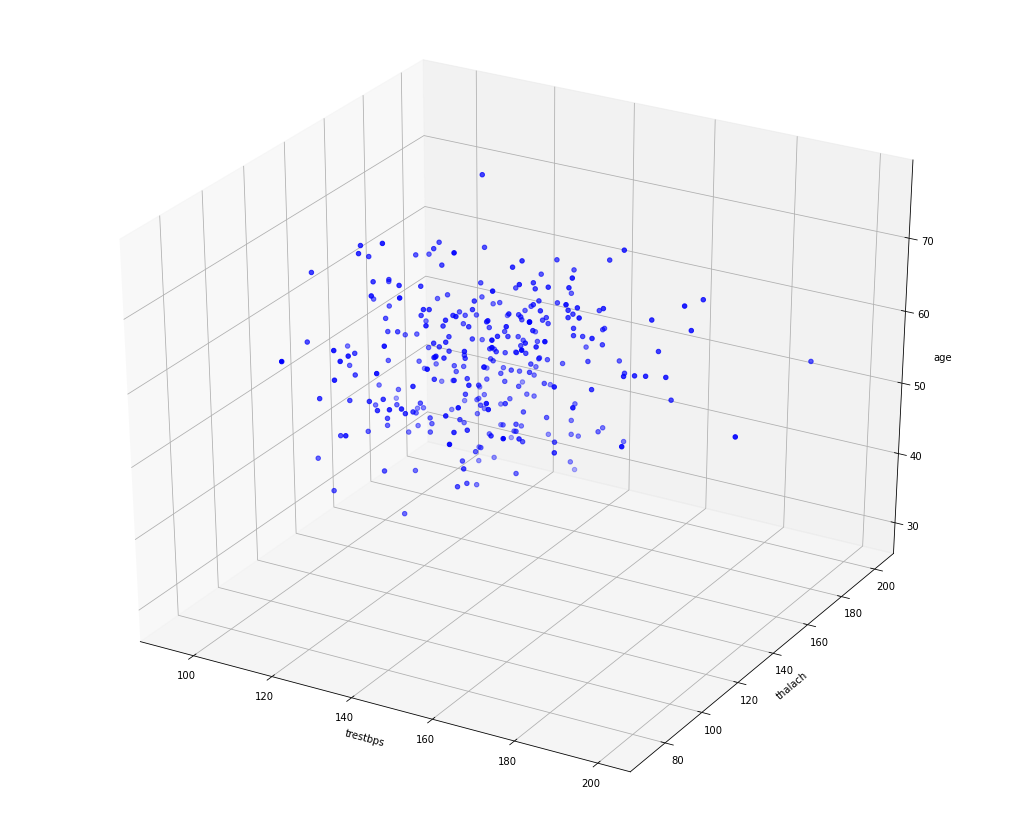

In [11]:
from mpl_toolkits.mplot3d import Axes3D
         
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
         
ax.scatter(df['trestbps'],
                    df['thalach'],
                    df['age'],
                    c='b')

ax.set_xlabel("trestbps")
ax.set_ylabel("thalach")
ax.set_zlabel("age")
plt.show()

Figure4: shows the 3D chart of trestbps and thalach plotted against age.

# Training the Model

We can now train the model. First, create two DataFrames: x and Y. The x DataFrame will contain the combination of the thalach and trestbps features, while the Y DataFrame will contain the age label:

## 6.1 Create DataFrames: x and Y

In [12]:
x = pd.DataFrame(np.c_[df['thalach']], columns = ['thalach'])
Y = df['age']

We will split the dataset into 70 percent for training and 30 percent for testing:

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

In [14]:
# Print out the shape of the training sets:
print(x_train.shape)
print(Y_train.shape)

(212, 1)
(212,)


In [15]:
# Print out the shape of the testing set 
print(x_test.shape)
print(Y_test.shape)

(91, 1)
(91,)


In [16]:
# Perform Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

Once the model is trained, we will use the testing set to perform some predictions:

In [17]:
age_pred = model.predict(x_test)

To learn how well our model performed, we use the R-Squared method that you learned in the previous chapter. The R-Squared method lets you know how close the test data fits the regression line. A value of 1.0 means a perfect fit. So, you aim for a value of R-Squared that is close to 1:

## 6.2 Find a R-Squared Value

In [18]:
print('R-Squared: %.4f' % model.score(x_test,Y_test))

R-Squared: 0.1143


# Issues: R-Squared is lower than acceptance line (>80%)

## 6.3 Plot a scatter plot showing the

75.16535122119556


Text(0.5, 1.0, 'Actual age vs Predicted age')

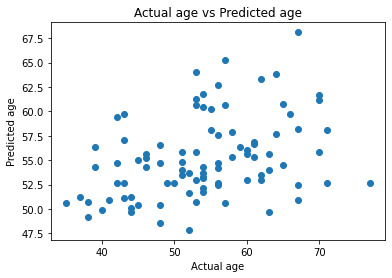

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, age_pred)
print(mse)
         
plt.scatter(Y_test, age_pred)
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.title("Actual age vs Predicted age")

## 6.4 Getting the Intercept and Coefficients

In [20]:
print(model.intercept_)
print(model.coef_)

80.19307202179273
[-0.17022326]


# Plotting the 3D Hyperplane
## 7. Plot the 3D graph 
hint: Figure6.8

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#dataset = load_boston()
#df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

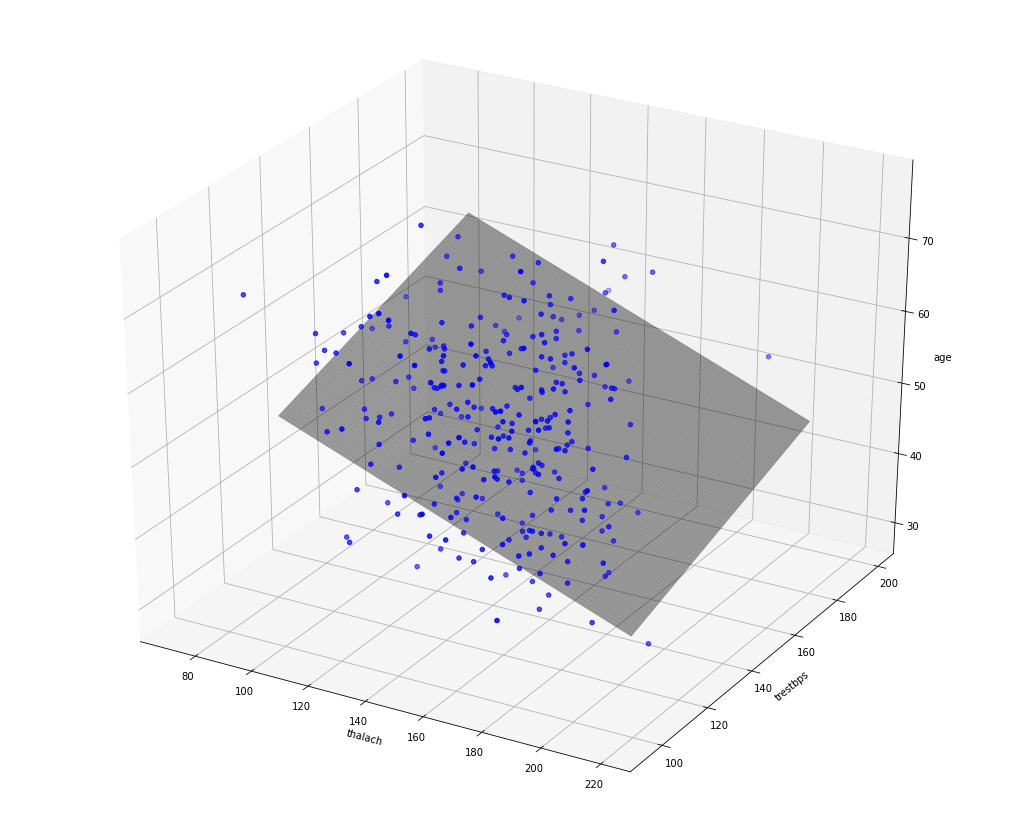

In [22]:
x = pd.DataFrame(np.c_[df['thalach'], df['trestbps']], columns = ['thalach','trestbps'])
y = df['age']
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['thalach'],x['trestbps'],Y, c='b')
         
ax.set_xlabel("thalach")
ax.set_ylabel("trestbps")
ax.set_zlabel("age")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(100, 220, 1)   #---for thalach---    # generate a mesh
y_surf = np.arange(100, 180, 1)   #---for trestbps--- # generate a mesh
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
         
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf), rstride=1, cstride=1, color='None', alpha = 0.4)
plt.show()


# Polynomial Regression

In the previous section, you saw how to apply linear regression to predict the prices of houses in the Boston area. While the result is somewhat acceptable, it is not very accurate. This is because sometimes a linear regression line might not be the best solution to capture the relationships between the features and label accurately. In some cases, a curved line might do better.

In [35]:
#display(df)
df = pd.read_csv("health2.csv")

## 8.1 Plot the points of "age" and "thalach" 

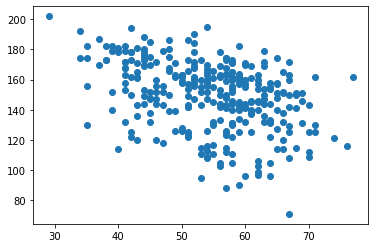

In [36]:
plt.scatter(df['age'],df['thalach'])

Using linear regression, you can try to plot a straight line cutting through most of the points:

In [37]:
model = LinearRegression()

x = df['age'][0:302, np.newaxis] #--- convert to 2D array
y = df['thalach'][0:302, np.newaxis] #---convert to 2D array

model.fit(x,y)

LinearRegression()

## 8.2 Try to plot a straight line cutting through most of the points:
hint: Figure6.11

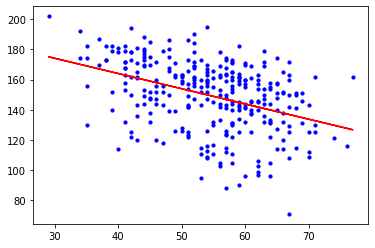

R-Squared for training set: 0.1603


In [39]:
# ---perform prediction
y_pred = model.predict(x)

#---plot the training points---
plt.scatter(x,y, s=10, color='b')

#---plot the straight line---
plt.plot(x, y_pred, color='r')
plt.show()

#---calculate R-Squared---
print('R-Squared for training set: %.4f' % model.score(x,y))

## 8.3 Plot Polynomial Regression in Scikit-learn
hint: https://www.w3schools.com/python/python_ml_polynomial_regression.asp   
knovel did not work well in this dataset. So I used the diffrent resources

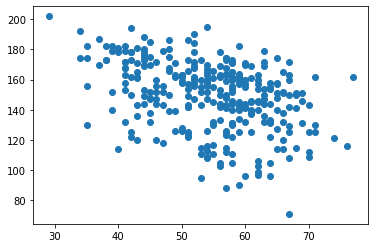

In [52]:
x = df['age']
y = df['thalach']

plt.scatter(x, y)
plt.show()

In [49]:
import numpy
import matplotlib.pyplot as plt

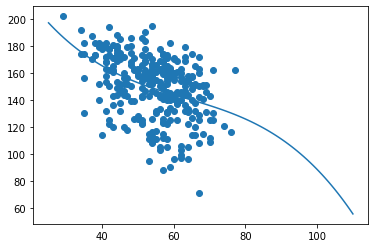

In [57]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(25, 110, 100) # play this parameter to find the best curve line

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

## 8.4 Find R-Squared Value

In [51]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x)))

0.1626008691945956


### Polynomial Regression did improve a bit of accuracy and R-Squared value But still not an acceptable value which is less than 80%  
### The result: 0.1626008691945956 indicates a very bad relationship, and tells us that this data set is not suitable for polynomial regression.

## Possible Reasons: 
1) Less Input Datasets  
2) High Variance with bias  

## What to do?
1) Boosting / bagging methods  
2) cross-validation is a better approximation. Moreover instead of only measuring accuracy, efforts should be on improving the algorithm. If the algorithm is improved, accuracy will also improve vis-a-vis the earlier approaches.